### Import libraries


In [1]:
import pathlib
import pandas as pd
import seaborn as sns
from matplotlib.colors import rgb2hex

import sys

sys.path.append("../utils")
from load_utils import split_data
from analysis_utils import get_class_colors, show_1D_umap, show_2D_umap, show_3D_umap

2024-01-11 21:53:43.229395: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


### Load training data


In [2]:
training_data_path = pathlib.Path(
    "../3.normalize_data/normalized_data__no_ic/training_data.csv.gz"
)
training_data = pd.read_csv(training_data_path, compression="gzip", index_col=0)

training_data

,Mitocheck_Phenotypic_Class,Cell_UUID,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Frame,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,...,DP__efficientnet_1270,DP__efficientnet_1271,DP__efficientnet_1272,DP__efficientnet_1273,DP__efficientnet_1274,DP__efficientnet_1275,DP__efficientnet_1276,DP__efficientnet_1277,DP__efficientnet_1278,DP__efficientnet_1279
0,Large,3ba3aae1-489a-4eae-87f5-f3c31c9c91e9,397,618,LT0010_27,173,83,1,LT0010_27_173,LT0010_27/LT0010_27_173_83.tif,...,0.219501,-0.416624,-0.602064,-1.149988,-0.520968,1.292410,11.614993,0.535486,2.875145,-0.837069
1,Large,c16d0e78-70db-49ff-bc48-027342fe00da,359,584,LT0010_27,173,83,1,LT0010_27_173,LT0010_27/LT0010_27_173_83.tif,...,-0.664476,-1.397901,-0.645742,-1.067267,-0.007235,2.299296,1.372604,1.280672,-0.541297,-1.152779
2,Large,4a6e4da9-941d-4a6c-968e-cb1932839313,383,685,LT0010_27,173,83,1,LT0010_27_173,LT0010_27/LT0010_27_173_83.tif,...,0.636564,1.402440,-0.552524,0.266396,-0.329313,0.126110,-0.322944,0.813079,-0.510780,-0.057089
3,Large,bd03dd73-f4fb-4a25-93ce-1720e55de69b,932,532,LT0013_38,42,75,1,LT0013_38_42,LT0013_38/LT0013_38_42_75.tif,...,-0.919341,-0.865719,-0.520659,0.222127,0.371482,2.289868,-0.133843,1.201244,-1.771245,-0.510236
4,Large,9721f66a-6a76-4a22-a257-e021a5da9e01,479,110,LT0013_38,42,75,1,LT0013_38_42,LT0013_38/LT0013_38_42_75.tif,...,0.501800,-0.410976,-0.310428,-1.285884,-0.546935,2.795317,2.514185,0.361808,-0.322569,-0.583547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2889,OutOfFocus,898c4f3a-08ab-4447-9307-ee4e56c02b53,383,219,LT0601_01,217,49,1,LT0601_01_217,LT0601_01/LT0601_01_217_49.tif,...,0.864102,7.876805,0.277454,-1.392754,-0.385585,-1.372417,-0.006438,-2.641339,0.591877,2.428400
2890,OutOfFocus,777fb679-c278-4895-90a0-bf3f42873f58,975,293,LT0603_03,2,49,1,LT0603_03_2,LT0603_03/LT0603_03_2_49.tif,...,0.446173,6.153245,0.315240,-0.943492,-0.672695,-0.996821,-1.218016,-0.848513,0.826606,3.255578
2891,OutOfFocus,122e3161-b1b8-4ef3-908c-0dc898ce031f,899,302,LT0603_03,2,49,1,LT0603_03_2,LT0603_03/LT0603_03_2_49.tif,...,0.252932,9.818994,0.471850,-1.108161,-0.962377,-1.281038,-0.899536,-0.492517,0.646061,0.867249
2892,OutOfFocus,8bed4ad7-4634-41f5-a7eb-85da98a97e88,946,281,LT0603_03,2,49,1,LT0603_03_2,LT0603_03/LT0603_03_2_49.tif,...,-0.157890,9.674776,0.401878,-0.968502,-0.952200,-1.040677,-2.199418,-2.137904,0.776055,2.449826


### Preview and save single-cell counts per phenotypes


In [3]:
# define results directory
results_dir = pathlib.Path("results__no_ic/")
results_dir.mkdir(parents=True, exist_ok=True)

# get single-cell class counts
single_cell_class_counts = (
    training_data["Mitocheck_Phenotypic_Class"]
    .value_counts()
    .rename_axis("Mitocheck_Phenotypic_Class")
    .reset_index(name="Single_Cell_Counts")
)

# save single-cell class counts
single_cell_class_counts_save_path = pathlib.Path(
    f"{results_dir}/single_cell_class_counts.csv"
)
single_cell_class_counts.to_csv(single_cell_class_counts_save_path)

### Set UMAP display settings, save directory, class colors


In [4]:
point_size = 25
alpha = 0.6
color_palette = "bright"

classes_1 = [
    "Large",
    "Prometaphase",
    "Grape",
    "Interphase",
    "Apoptosis",
    "ADCCM",
    "Folded",
    "SmallIrregular",
    "Polylobed",
    "Metaphase",
    "Binuclear",
    "Hole",
    "Anaphase",
    "MetaphaseAlignment",
    "Elongated",
    "OutOfFocus",
]

# classes that aren't commented out will get a color for their particular class
# those that are commented out will be colored gray and labeled "other"
classes_2 = [
    # "Large",
    "Prometaphase",
    "Grape",
    "Interphase",
    "Apoptosis",
    "ADCCM",
    # "Folded",
    # "SmallIrregular",
    # "Polylobed",
    # "Metaphase",
    # "Binuclear",
    # "Hole",
    # "Anaphase",
    # "MetaphaseAlignment",
    # "Elongated",
    # "OutOfFocus",
]

class_colors_1 = get_class_colors(classes_1, "rainbow")
class_colors_2 = get_class_colors(classes_2, "bright")

### Create UMAPs


Showing UMAPs created with CP features


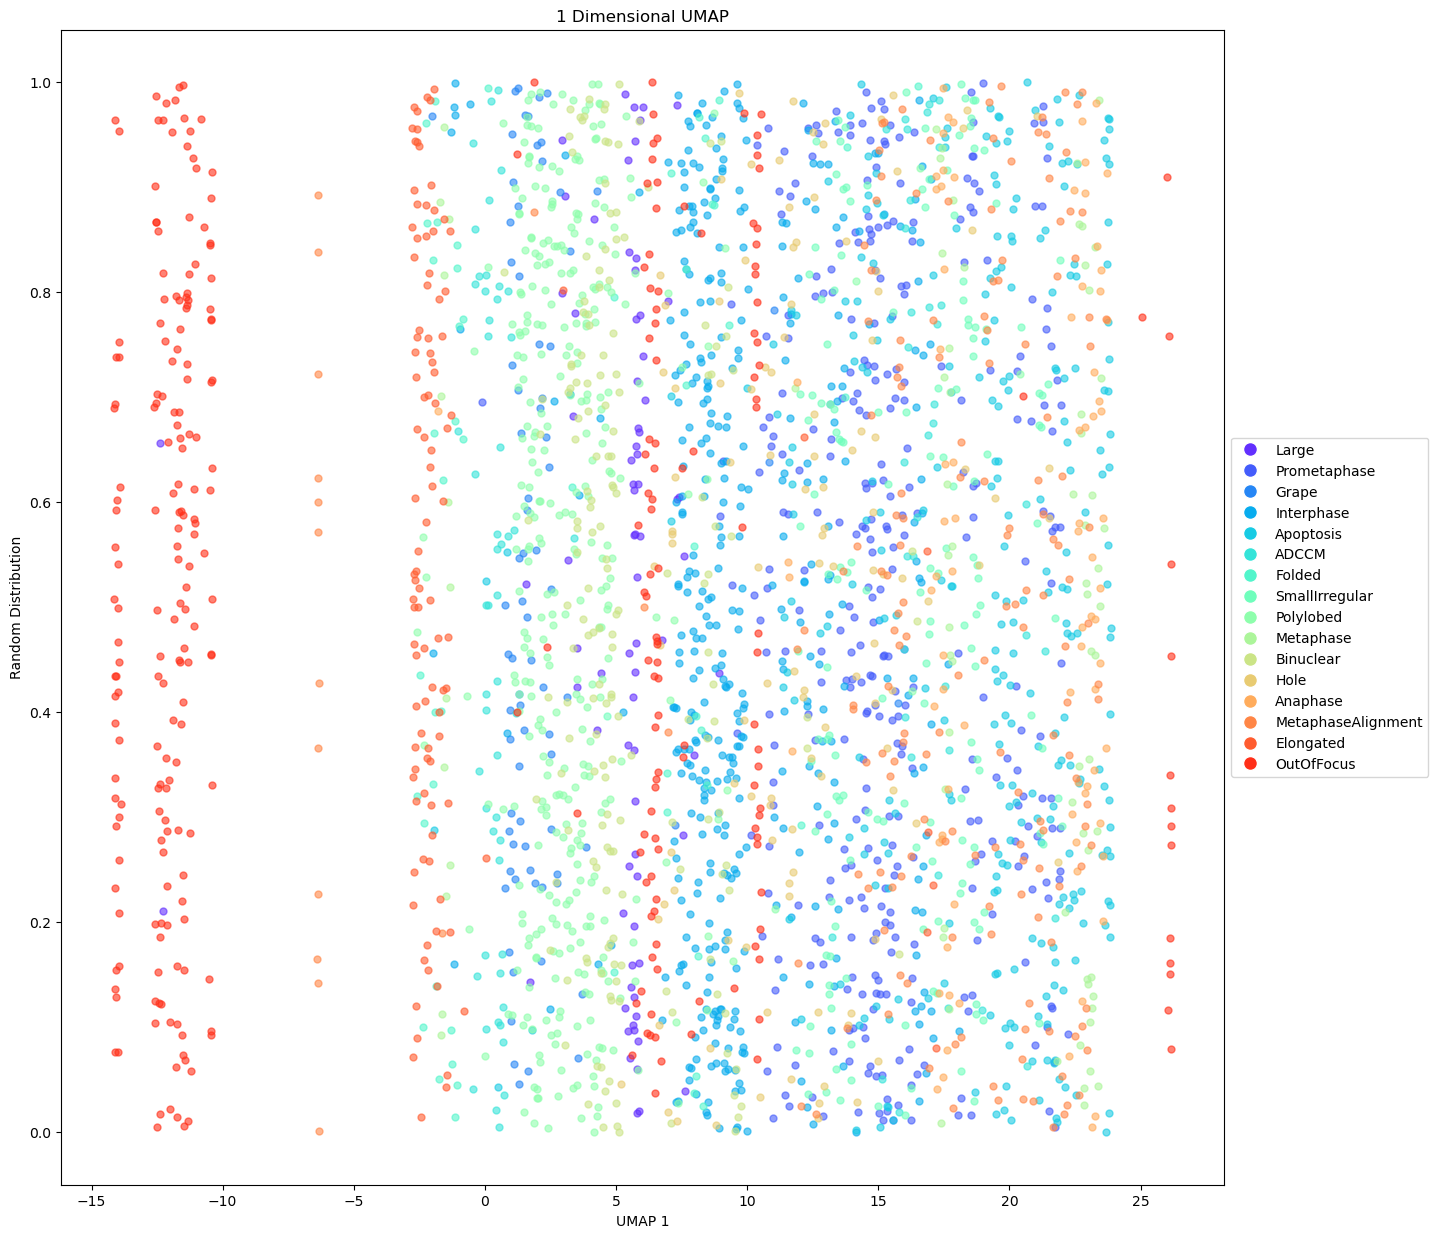

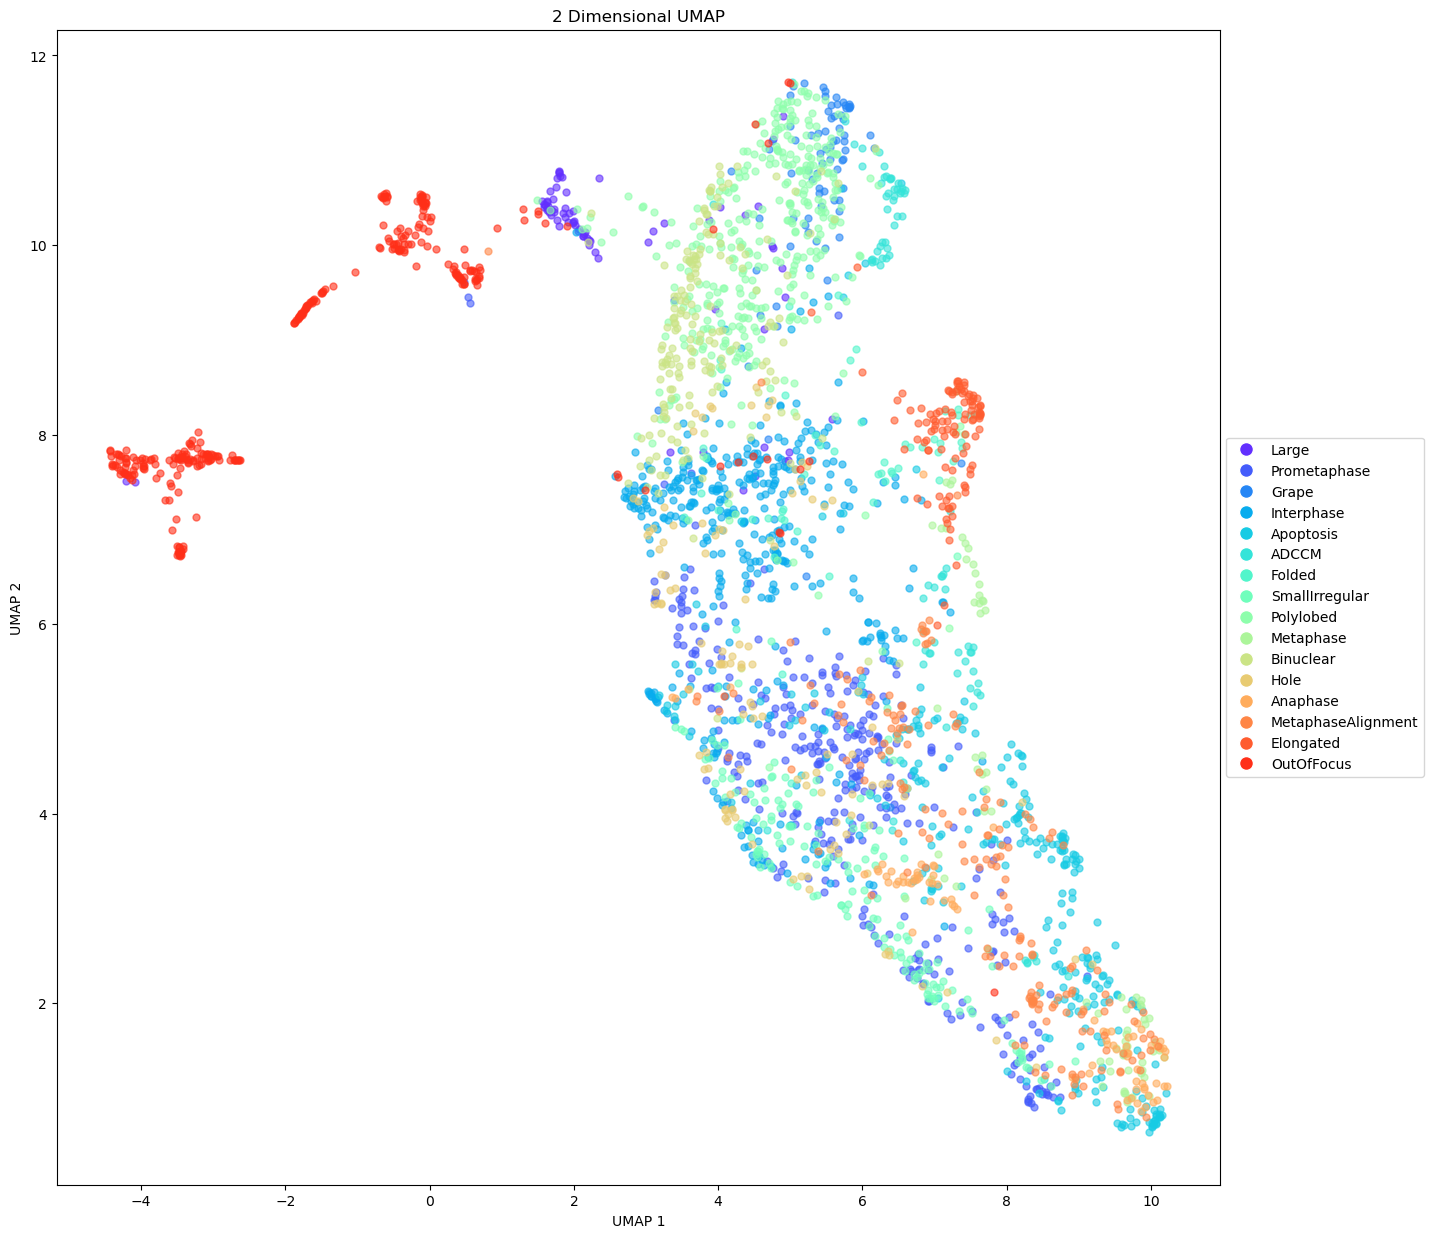

Showing UMAPs created with DP features


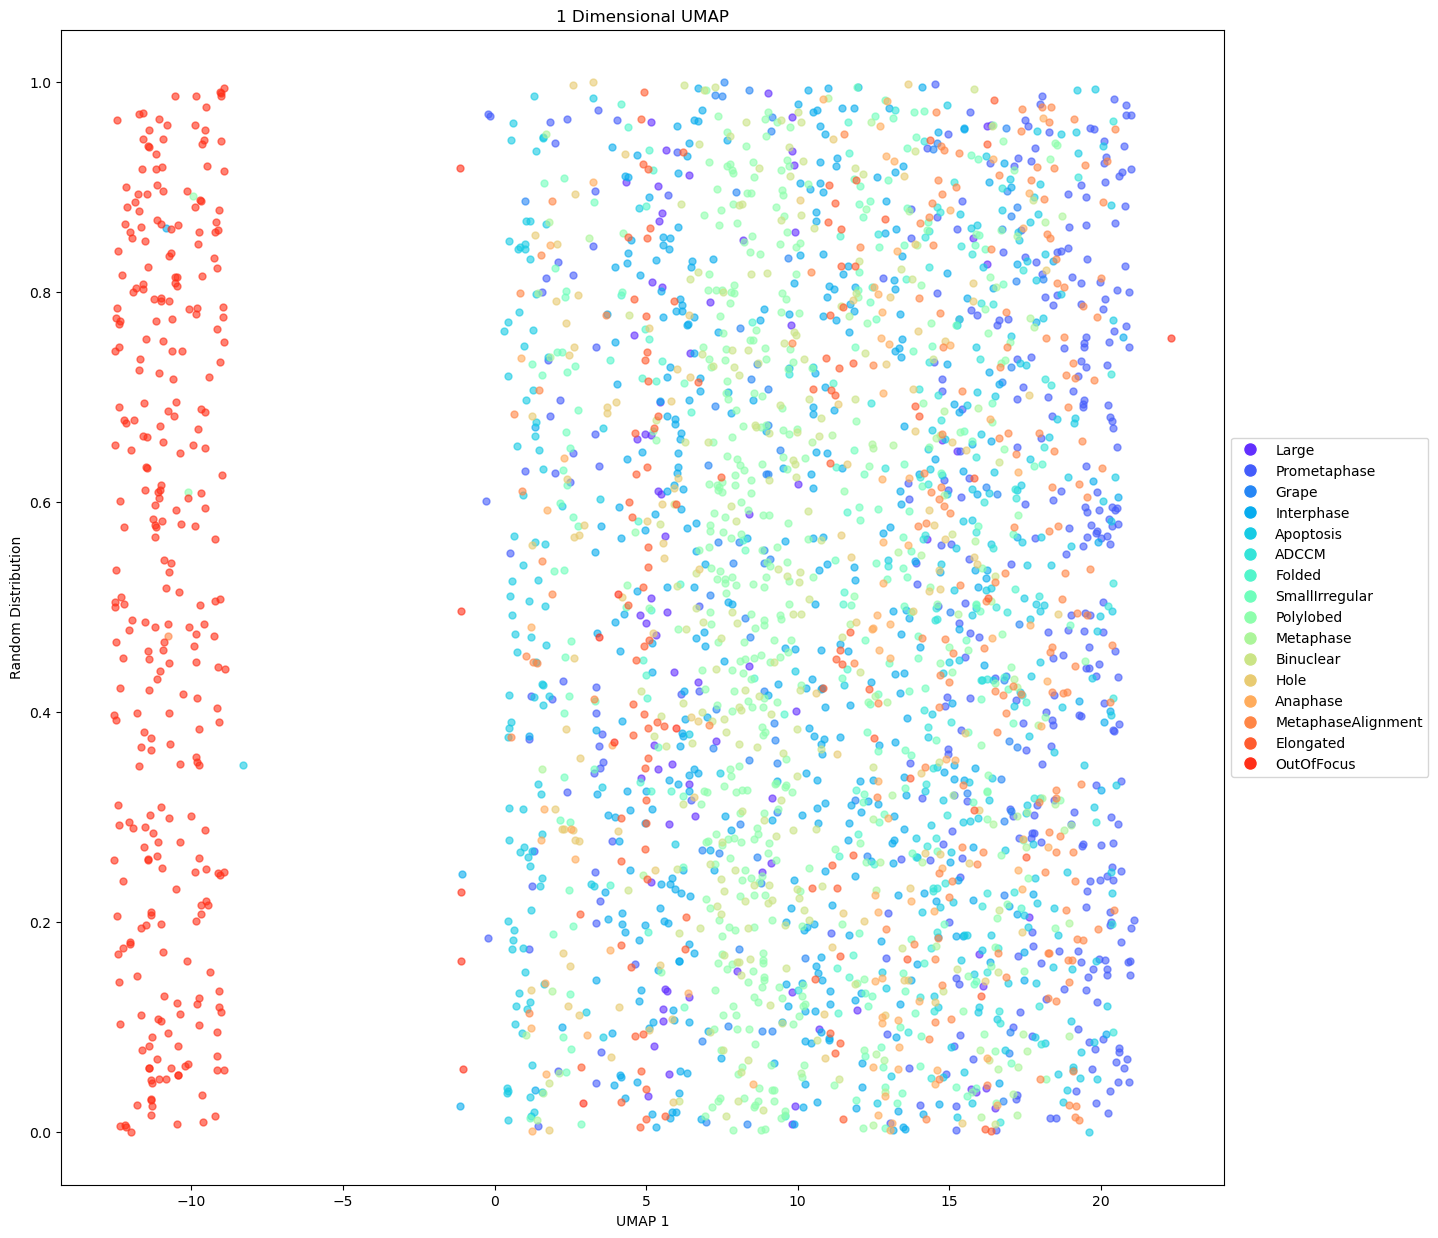

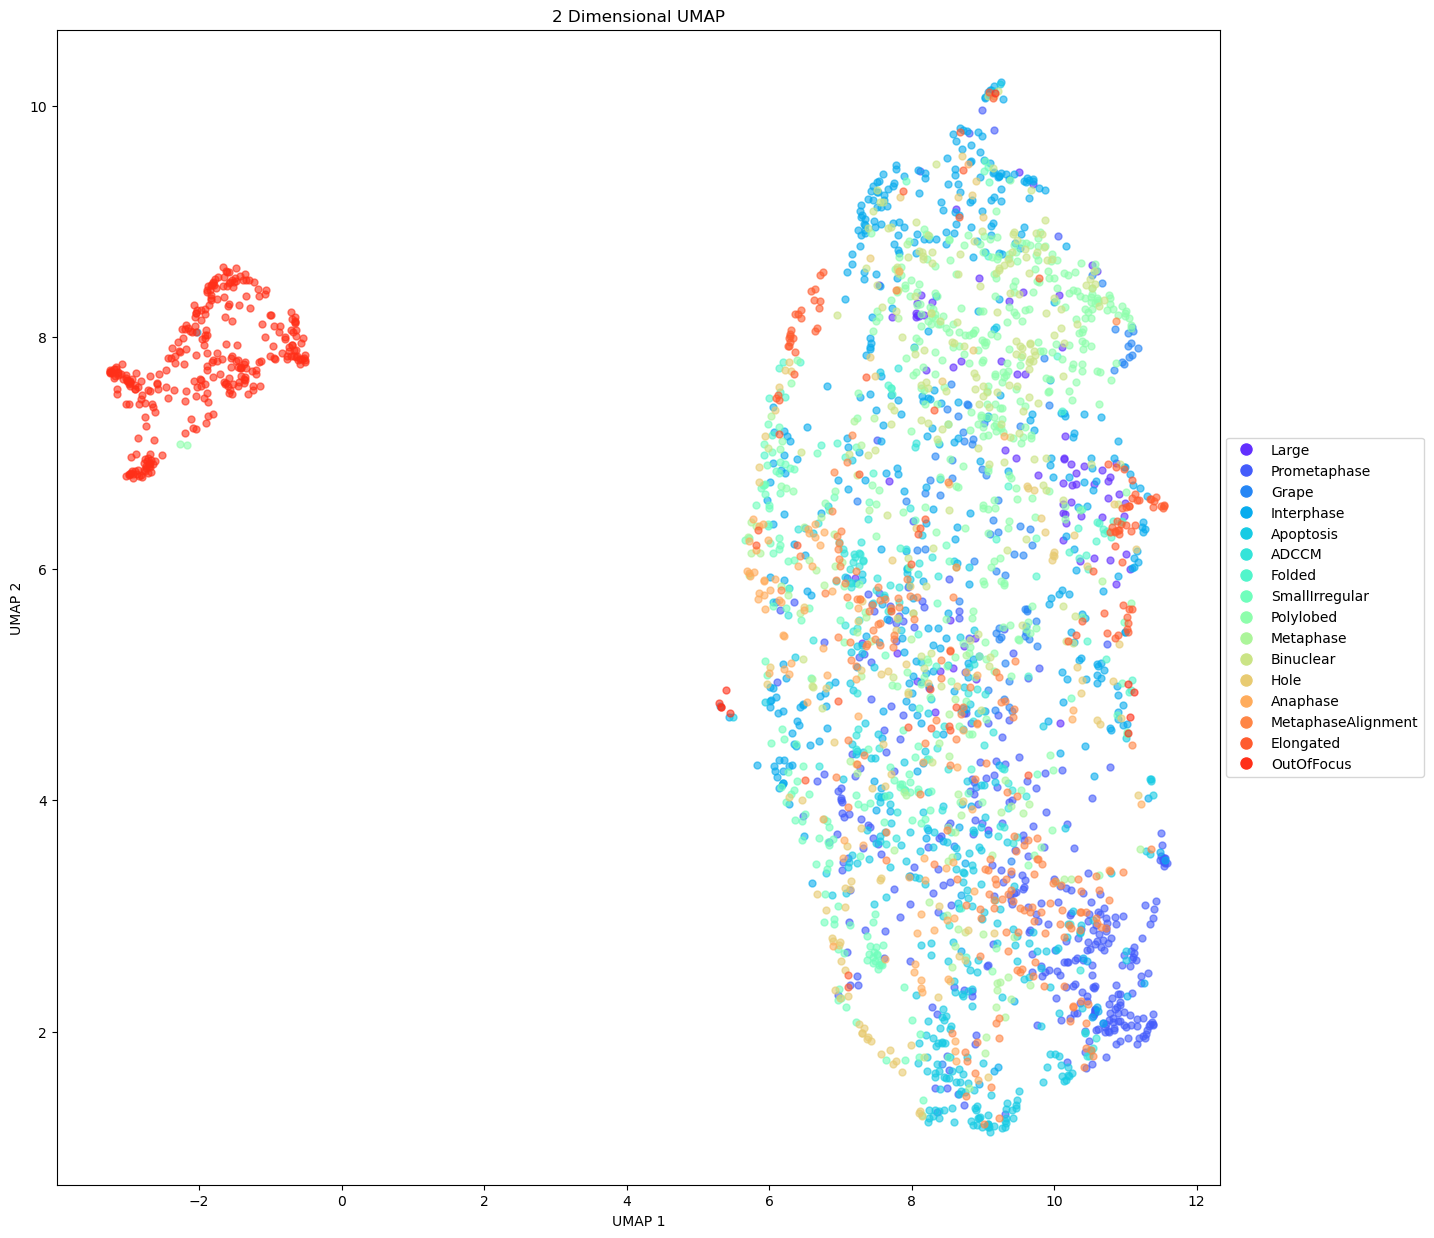

Showing UMAPs created with CP_and_DP features


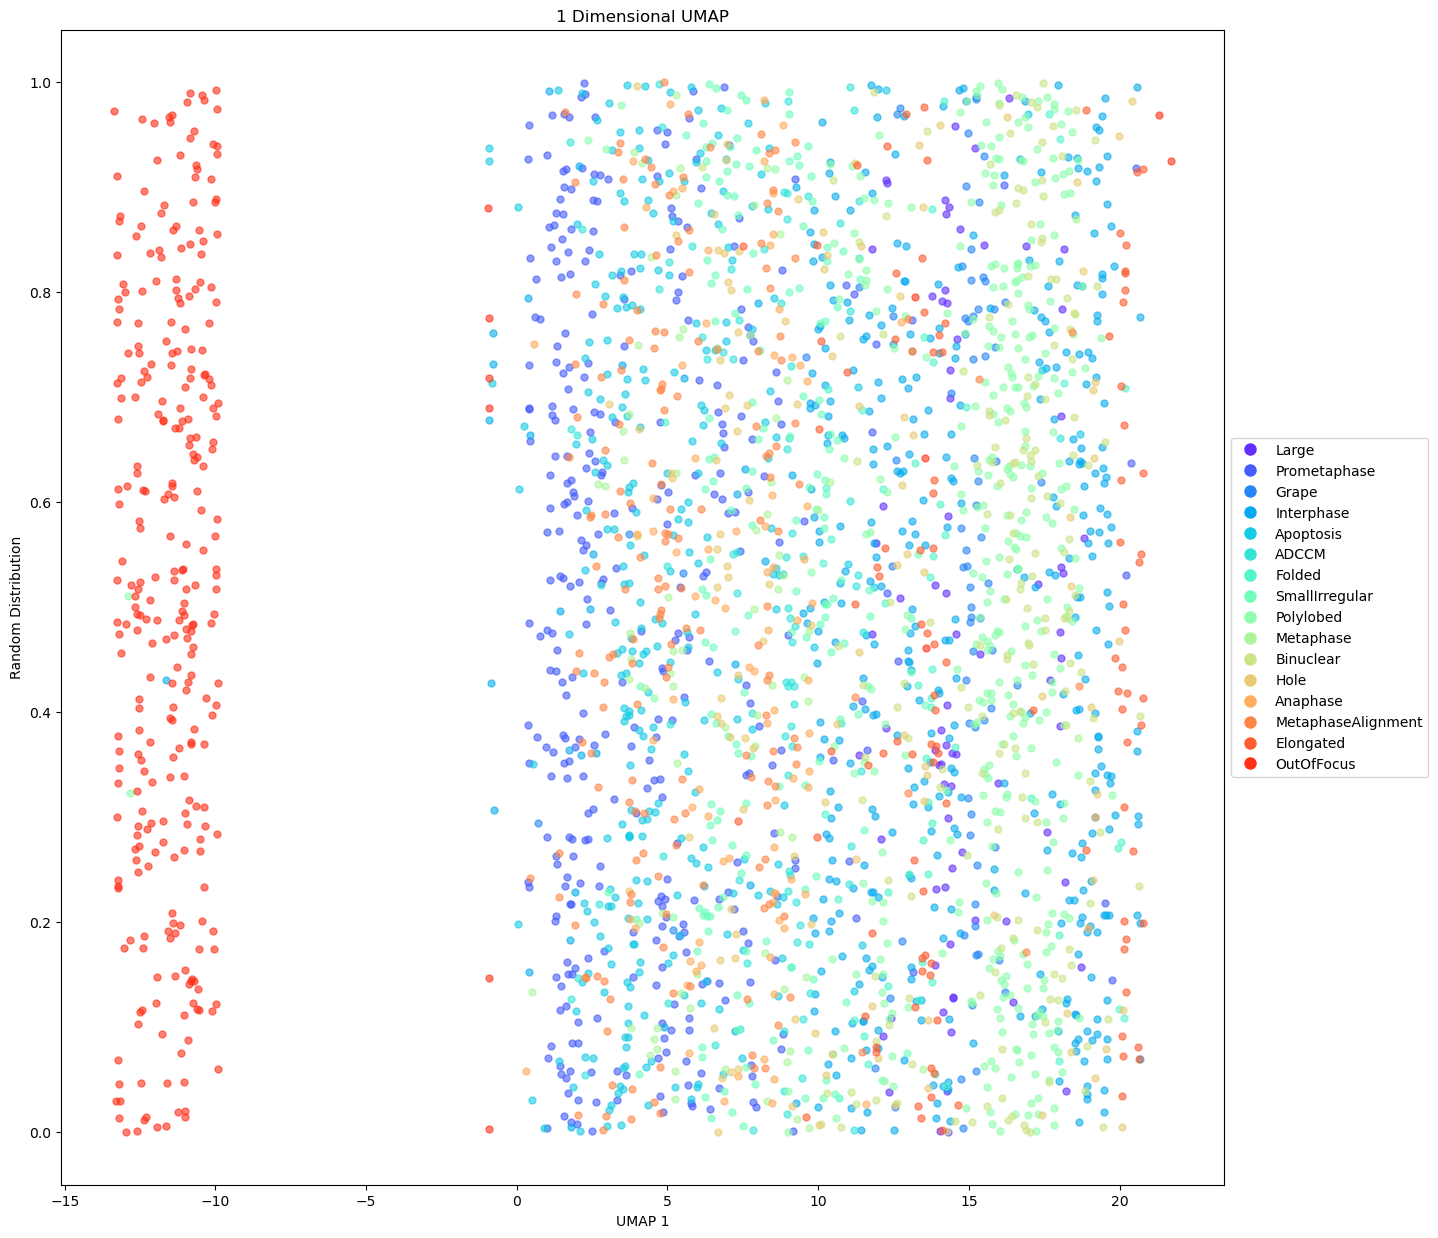

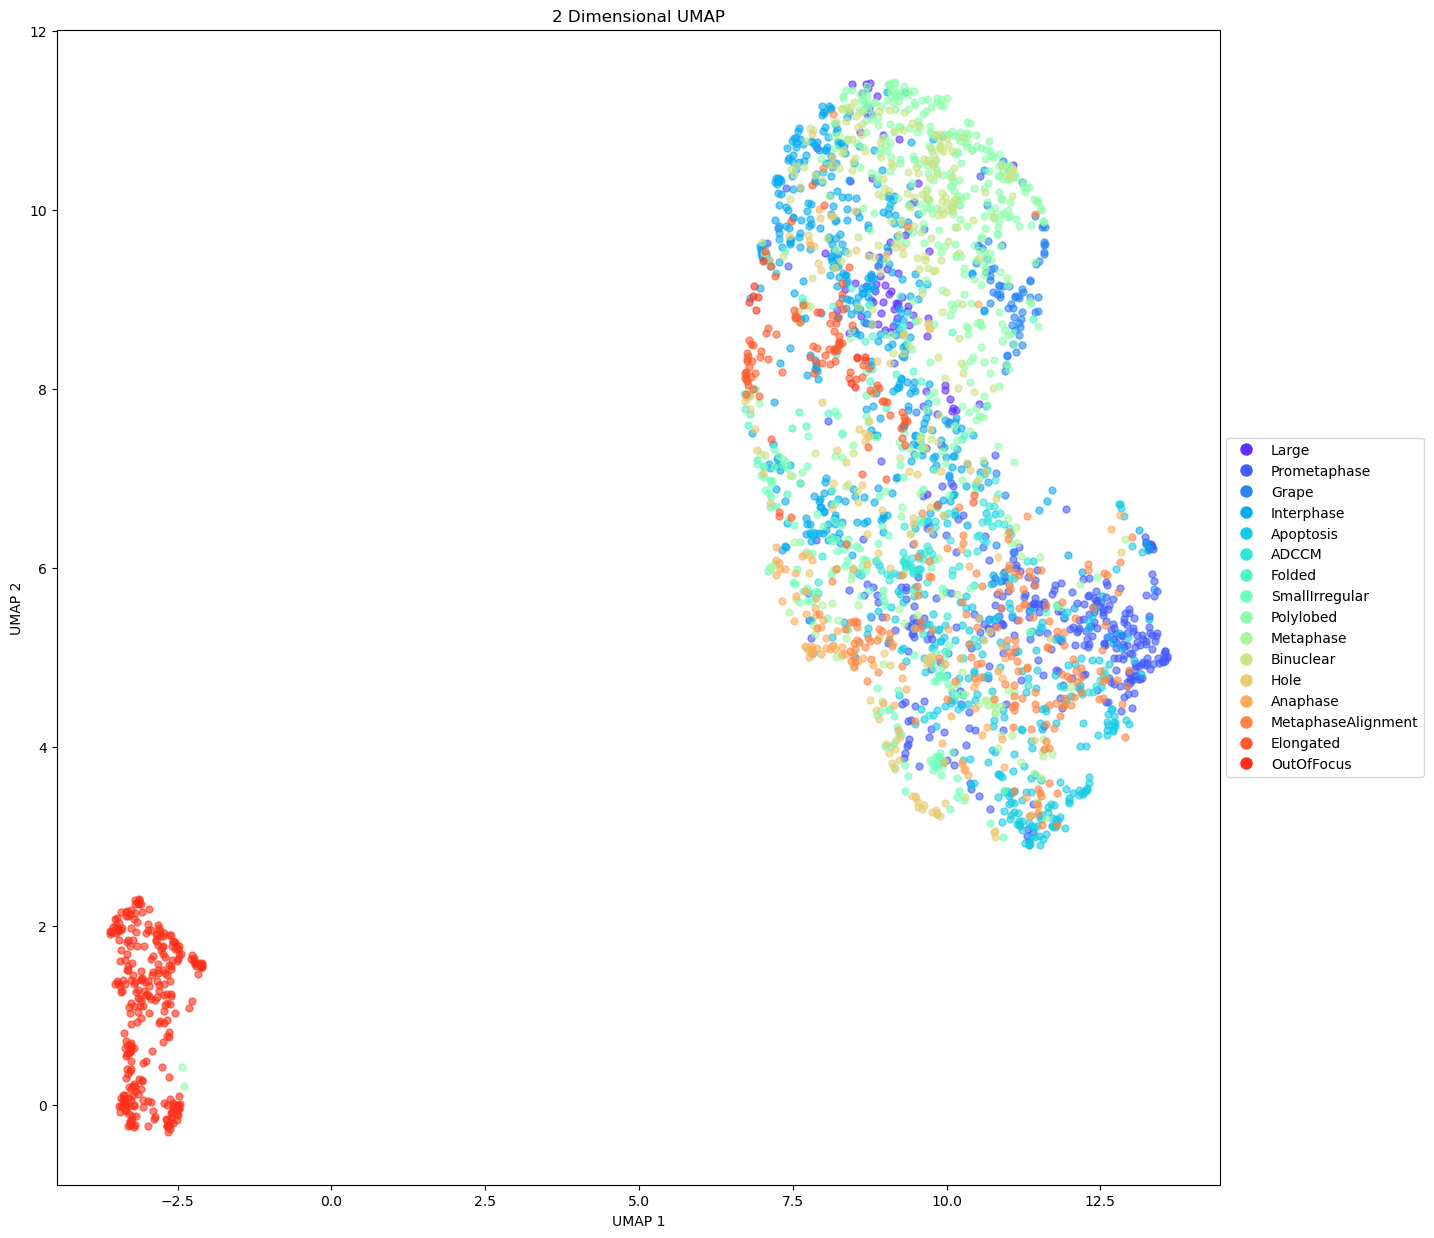

In [5]:
# list to compile embeddings tidy data
compiled_tidy_embeddings = []

# feature types to create UMAPs for
feature_types = ["CP", "DP", "CP_and_DP"]

# create 1D and 2D umaps for each feature type
for feature_type in feature_types:
    print(f"Showing UMAPs created with {feature_type} features")

    # the trainind data dataframe is split into two components:
    # metadata: info about the cell including its labeled phenotypic class, location, perturbation, etc
    # feature data: the CP, DP, or merged features for each cell
    metadata_dataframe, feature_data = split_data(training_data, feature_type)
    phenotypic_classes = metadata_dataframe["Mitocheck_Phenotypic_Class"]

    # show 1D umaps
    # class colors 1 - all classes included
    show_1D_umap(
        feature_data,
        phenotypic_classes,
        class_colors_1,
        point_size=point_size,
        alpha=alpha,
    )

    # show 2D umaps
    # class colors 1 - all classes included
    embeddings_2D = show_2D_umap(
        feature_data,
        phenotypic_classes,
        class_colors_1,
        point_size=point_size,
        alpha=alpha,
    )

    # add feature types column for tidy long data
    embeddings_2D["Feature_Type"] = feature_type
    # add cell UUID types column for tidy long data
    embeddings_2D["Cell_UUID"] = metadata_dataframe["Cell_UUID"]
    # melt embeddings data into tidy format
    embeddings_2D = pd.melt(
        embeddings_2D,
        id_vars=["Mitocheck_Phenotypic_Class", "Feature_Type", "Cell_UUID"],
        value_vars=["UMAP1", "UMAP2"],
        var_name="UMAP_Embedding",
        value_name="Embedding_Value",
    )

    # add these tidy embeddings to compilation
    compiled_tidy_embeddings.append(embeddings_2D)

### Save and preview tidy embedding data


In [6]:
# compile tidy embeddings into one dataframe
compiled_tidy_embeddings = pd.concat(compiled_tidy_embeddings).reset_index(drop=True)

# save tidy embeddings
compiled_tidy_embeddings_save_path = pathlib.Path(
    f"{results_dir}/compiled_2D_umap_embeddings.csv"
)
compiled_tidy_embeddings.to_csv(compiled_tidy_embeddings_save_path)

# preview tidy embeddings data
compiled_tidy_embeddings

,Mitocheck_Phenotypic_Class,Feature_Type,Cell_UUID,UMAP_Embedding,Embedding_Value
0,Large,CP,3ba3aae1-489a-4eae-87f5-f3c31c9c91e9,UMAP1,4.637420
1,Large,CP,c16d0e78-70db-49ff-bc48-027342fe00da,UMAP1,2.119242
2,Large,CP,4a6e4da9-941d-4a6c-968e-cb1932839313,UMAP1,4.981214
3,Large,CP,bd03dd73-f4fb-4a25-93ce-1720e55de69b,UMAP1,4.879813
4,Large,CP,9721f66a-6a76-4a22-a257-e021a5da9e01,UMAP1,4.929880
...,...,...,...,...,...
17359,OutOfFocus,CP_and_DP,898c4f3a-08ab-4447-9307-ee4e56c02b53,UMAP2,1.080656
17360,OutOfFocus,CP_and_DP,777fb679-c278-4895-90a0-bf3f42873f58,UMAP2,-0.069656
17361,OutOfFocus,CP_and_DP,122e3161-b1b8-4ef3-908c-0dc898ce031f,UMAP2,1.103612
17362,OutOfFocus,CP_and_DP,8bed4ad7-4634-41f5-a7eb-85da98a97e88,UMAP2,0.285271
